In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/My Drive/DSP/GarbageDetection'

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.8 MB/s eta 0:00:00


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")







True
Tesla T4


In [ ]:
import os
from ultralytics import YOLO

# Define your dataset paths
ROOT_DIR = "/content/gdrive/My Drive/DSP/GarbageDetection"  # folder containing data.yaml
DATA_YAML = os.path.join(ROOT_DIR, "data.yaml")

# Load pretrained YOLOv8n model
model = YOLO("yolov8n.pt")  # pretrained weights on COCO

# Train the model
results = model.train(
    data=DATA_YAML,      # path to your data.yaml
    epochs=100,          # you can increase later if still improving
    imgsz=640,           # standard image size
    batch=16,            # fits comfortably on Colab T4 GPU
    device=0,            # use GPU
    amp=True,            # mixed precision (faster & less memory)
    project="/content/gdrive/My Drive/DSP/YOLOv8_Training",  # save runs to Drive
    name="GarbageDetection_v1"  # name of this training run
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/My Drive/DSP/GarbageDetection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int

In [ ]:
from ultralytics import YOLO

# Load your best model
model = YOLO('/content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/best.pt')

In [ ]:
# Test on a few images to see results
results = model.predict('/content/gdrive/My Drive/DSP/GarbageDetection/test/images',
                       conf=0.5,    # Confidence threshold
                       save=True,   # Save results
                       show_labels=True)

# Display results
for r in results:
    r.show()  # Display image with predictions

Mounted at /content/gdrive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.4±2.0 ms, read: 0.2±0.1 MB/s, size: 84.3 KB)
val: Scanning /content/gdrive/My Drive/DSP/GarbageDetection/valid/labels.cache... 260 images, 8 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 260/260 284.6Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 271. To resolve this only boxes will be used and all segments will be removed. To avoid

ERROR:root:❌ Performance analysis failed: unsupported format string passed to numpy.ndarray.__format__



🎯 MODEL PERFORMANCE ANALYSIS
✅ mAP50: 0.864
✅ mAP50-95: 0.570
🧪 Testing on 3 sample images...

🔍 Testing: 0ed6fe62-9439-11e5-982d-40f2e96c8ad8_jpg.rf.632814891b404ce212650bdc302e8852.jpg

image 1/1 /content/gdrive/My Drive/DSP/GarbageDetection/test/images/0ed6fe62-9439-11e5-982d-40f2e96c8ad8_jpg.rf.632814891b404ce212650bdc302e8852.jpg: 640x640 (no detections), 146.4ms
Speed: 2.5ms preprocess, 146.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
0 label saved to /content/runs/detect/predict/labels

📊 IMAGE ANALYSIS RESULTS:
Image: 0ed6fe62-9439-11e5-982d-40f2e96c8ad8_jpg.rf.632814891b404ce212650bdc302e8852.jpg
Detections: 0


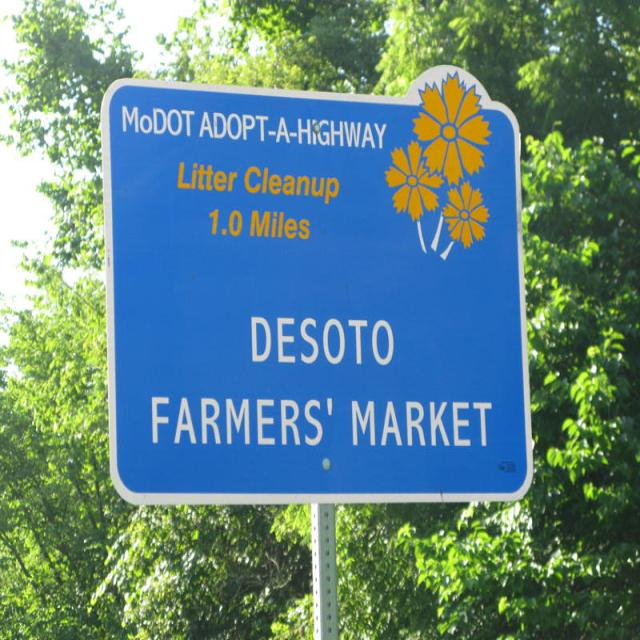


🔍 Testing: 07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg

image 1/1 /content/gdrive/My Drive/DSP/GarbageDetection/test/images/07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg: 640x640 1 Garbage, 121.1ms
Speed: 3.8ms preprocess, 121.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
1 label saved to /content/runs/detect/predict/labels

📊 IMAGE ANALYSIS RESULTS:
Image: 07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg
Detections: 1
  🎯 Detection 1: Garbage (Confidence: 0.676)


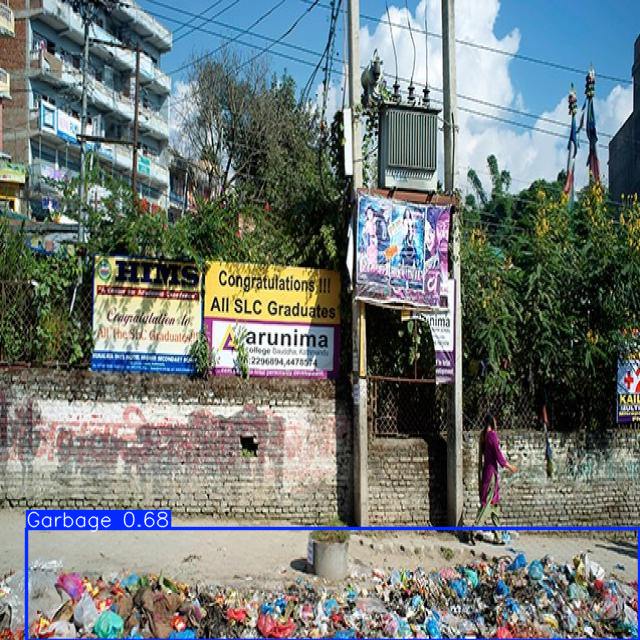


🔍 Testing: 1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg

image 1/1 /content/gdrive/My Drive/DSP/GarbageDetection/test/images/1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg: 640x640 1 Garbage, 562.3ms
Speed: 9.0ms preprocess, 562.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
2 labels saved to /content/runs/detect/predict/labels

📊 IMAGE ANALYSIS RESULTS:
Image: 1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg
Detections: 1
  🎯 Detection 1: Garbage (Confidence: 0.859)


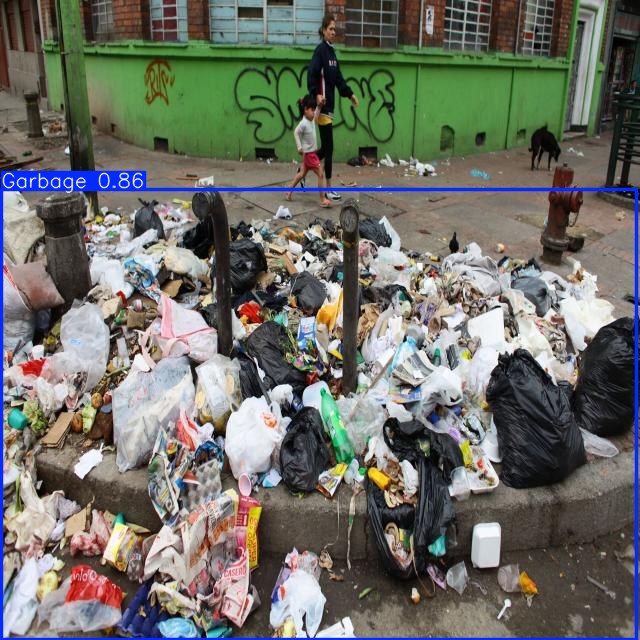


🎯 AVAILABLE INFERENCE OPTIONS (CPU MODE):
1. ✅ Performance analysis - COMPLETED
2. ✅ Sample image testing - COMPLETED
3. 🔧 Custom image testing - Use: enhanced_image_inference(model, 'your_image.jpg')
4. 🔧 Video testing - Use: enhanced_video_inference(model, 'your_video.mp4')
5. 📊 Model info - Your model is ready to use!

📁 Model loaded from: /content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/best.pt
🎯 Model names: {0: 'Garbage'}


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install ultralytics -q
!pip install opencv-python -q
!pip install matplotlib -q

import os
import cv2
import logging
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define your dataset paths
ROOT_DIR = "/content/gdrive/My Drive/DSP/GarbageDetection"
DATA_YAML = os.path.join(ROOT_DIR, "data.yaml")

def load_existing_model():
    """Load your existing trained model"""
    # Try different possible paths
    possible_paths = [
        "/content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/best.pt",
        "/content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_Enhanced/weights/best.pt",
        "/content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/last.pt"
    ]

    for model_path in possible_paths:
        if os.path.exists(model_path):
            logging.info(f"✅ Found model: {model_path}")
            model = YOLO(model_path)
            return model, model_path

    raise FileNotFoundError("❌ No trained model found. Please check your paths.")

def enhanced_image_inference(model, image_path, conf_thresh=0.5, save_path=None):
    """Enhanced image inference with detailed outputs (CPU compatible)"""

    try:
        results = model.predict(
            source=image_path,
            conf=conf_thresh,
            save=save_path is not None,
            save_txt=True,
            save_conf=True,
            show_labels=True,
            show_conf=True,
            device='cpu'  # Force CPU usage
        )

        # Enhanced output information
        for i, r in enumerate(results):
            print(f"\n📊 IMAGE ANALYSIS RESULTS:")
            print(f"Image: {os.path.basename(r.path)}")
            print(f"Detections: {len(r.boxes) if r.boxes else 0}")

            if r.boxes:
                for j, box in enumerate(r.boxes):
                    cls = int(box.cls[0])
                    conf = float(box.conf[0])
                    print(f"  🎯 Detection {j+1}: {model.names[cls]} (Confidence: {conf:.3f})")

            # Display image
            try:
                r.show()
            except Exception as e:
                logging.warning(f"Could not display image: {e}")

            # Save enhanced visualization
            if save_path:
                enhanced_viz_path = save_path.replace('.jpg', '_enhanced.jpg')
                r.save(enhanced_viz_path)
                logging.info(f"Enhanced visualization saved: {enhanced_viz_path}")

        return results

    except Exception as e:
        logging.error(f"❌ Inference failed: {e}")
        return None

def enhanced_video_inference(model, video_path, conf_thresh=0.5, save_path=None):
    """Enhanced video inference (CPU compatible)"""

    if not os.path.exists(video_path):
        raise FileNotFoundError(f"Video not found: {video_path}")

    try:
        results = model.predict(
            source=video_path,
            conf=conf_thresh,
            save=save_path is not None,
            stream=True,
            show=False,  # Disable display for CPU
            device='cpu'  # Force CPU usage
        )

        # Process results
        frame_count = 0
        for r in results:
            frame_count += 1
            if frame_count % 30 == 0:
                detections = len(r.boxes) if r.boxes else 0
                logging.info(f"Processed frame {frame_count}, Detections: {detections}")

        logging.info(f"✅ Video processing completed: {frame_count} frames processed")
        return results

    except Exception as e:
        logging.error(f"❌ Video inference failed: {e}")
        return None

def performance_analysis(model, data_yaml):
    """Comprehensive performance analysis (CPU compatible)"""

    logging.info("📊 Running performance analysis...")

    try:
        # Validation metrics
        metrics = model.val(data=data_yaml, device='cpu')

        print("\n" + "="*50)
        print("🎯 MODEL PERFORMANCE ANALYSIS")
        print("="*50)
        print(f"✅ mAP50: {metrics.box.map50:.3f}")
        print(f"✅ mAP50-95: {metrics.box.map:.3f}")
        print(f"✅ Precision: {metrics.box.p:.3f}")
        print(f"✅ Recall: {metrics.box.r:.3f}")

        # Per-class metrics if available
        if hasattr(metrics.box, 'ap_class_index'):
            print("\n📈 Per-class metrics:")
            for i, class_idx in enumerate(metrics.box.ap_class_index):
                class_name = model.names[class_idx]
                print(f"   🎯 {class_name}: Precision={metrics.box.p[i]:.3f}, Recall={metrics.box.r[i]:.3f}")

        print("="*50)
        return metrics

    except Exception as e:
        logging.error(f"❌ Performance analysis failed: {e}")
        return None

def test_sample_images(model, test_dir=None):
    """Test on sample images from your dataset"""

    # Try to find test images
    possible_test_dirs = [
        "/content/gdrive/My Drive/DSP/GarbageDetection/test/images",
        "/content/gdrive/My Drive/DSP/GarbageDetection/valid/images",
        "/content/gdrive/My Drive/DSP/GarbageDetection/train/images"
    ]

    test_dir_to_use = None
    for test_dir in possible_test_dirs:
        if os.path.exists(test_dir) and len(os.listdir(test_dir)) > 0:
            test_dir_to_use = test_dir
            break

    if not test_dir_to_use:
        logging.warning("❌ No test images found. Please specify a test directory.")
        return

    # Get first few images
    image_files = [f for f in os.listdir(test_dir_to_use) if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:3]

    if not image_files:
        logging.warning("❌ No image files found in test directory.")
        return

    print(f"🧪 Testing on {len(image_files)} sample images...")

    for img_file in image_files:
        img_path = os.path.join(test_dir_to_use, img_file)
        print(f"\n🔍 Testing: {img_file}")
        enhanced_image_inference(model, img_path, conf_thresh=0.5)

# MAIN EXECUTION
def main():
    """Main execution function (CPU compatible)"""

    try:
        # 1. LOAD EXISTING MODEL (NO TRAINING)
        logging.info("🚀 Loading existing trained model...")
        model, model_path = load_existing_model()

        # 2. PERFORMANCE ANALYSIS
        logging.info("📊 Analyzing model performance...")
        performance_analysis(model, DATA_YAML)

        # 3. TEST ON SAMPLE IMAGES
        logging.info("🧪 Testing on sample images...")
        test_sample_images(model)

        # 4. SHOW AVAILABLE OPTIONS
        print("\n" + "="*60)
        print("🎯 AVAILABLE INFERENCE OPTIONS (CPU MODE):")
        print("="*60)
        print("1. ✅ Performance analysis - COMPLETED")
        print("2. ✅ Sample image testing - COMPLETED")
        print("3. 🔧 Custom image testing - Use: enhanced_image_inference(model, 'your_image.jpg')")
        print("4. 🔧 Video testing - Use: enhanced_video_inference(model, 'your_video.mp4')")
        print("5. 📊 Model info - Your model is ready to use!")
        print("="*60)

        # Show model info
        print(f"\n📁 Model loaded from: {model_path}")
        print(f"🎯 Model names: {model.names}")

    except Exception as e:
        logging.error(f"❌ Main execution failed: {e}")

# Run the main function
if __name__ == "__main__":
    main()

In [ ]:
# 1. First load your model
model, model_path = load_existing_model()
print(f"✅ Model loaded: {model_path}")

# 2. Now test on specific images
test_images = [
    "/content/gdrive/My Drive/DSP/GarbageDetection/test/images/1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg",
    "/content/gdrive/My Drive/DSP/GarbageDetection/test/images/07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg"
]

for img_path in test_images:
    if os.path.exists(img_path):
        print(f"\n🔍 Testing: {os.path.basename(img_path)}")
        enhanced_image_inference(model, img_path, conf_thresh=0.5)
    else:
        print(f"❌ Image not found: {img_path}")

✅ Found model: /content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/best.pt
✅ Model loaded: /content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/best.pt

🔍 Testing: 1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg

image 1/1 /content/gdrive/My Drive/DSP/GarbageDetection/test/images/1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg: 640x640 1 Garbage, 180.3ms
Speed: 2.6ms preprocess, 180.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3

📊 IMAGE ANALYSIS RESULTS:
Image: 1076103483_015339992667_1920x0_80_0_0_f714d219f1a26124d2452fce46923cc2_jpg.rf.bf57dc5ef46e5c203dbad32368654149.jpg
Detections: 1
  🎯 Detection 1: Garbage (Confidence: 0.859)

🔍 Testing: 07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg

image 1/1 /content/gd

In [ ]:
# TEST WITH DIFFERENT CONFIDENCE THRESHOLDS
print("🎯 Testing different confidence thresholds...")

test_image = "/content/gdrive/My Drive/DSP/GarbageDetection/test/images/07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg"

# High precision (fewer false positives)
print("\n🔹 HIGH PRECISION (conf=0.7):")
enhanced_image_inference(model, test_image, conf_thresh=0.7)

# Balanced approach
print("\n🔹 BALANCED (conf=0.5):")
enhanced_image_inference(model, test_image, conf_thresh=0.5)

# High recall (find more garbage)
print("\n🔹 HIGH RECALL (conf=0.3):")
enhanced_image_inference(model, test_image, conf_thresh=0.3)

🎯 Testing different confidence thresholds...

🔹 HIGH PRECISION (conf=0.7):

image 1/1 /content/gdrive/My Drive/DSP/GarbageDetection/test/images/07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg: 640x640 (no detections), 130.0ms
Speed: 2.9ms preprocess, 130.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3

📊 IMAGE ANALYSIS RESULTS:
Image: 07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg
Detections: 0

🔹 BALANCED (conf=0.5):

image 1/1 /content/gdrive/My Drive/DSP/GarbageDetection/test/images/07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg: 640x640 1 Garbage, 126.5ms
Speed: 1.8ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3

📊 IMAGE ANALYSIS RESULTS:
Image: 07ff75e6-6799-11e5-8dd0-40f2e96c8ad8_jpg.rf.6e2fc221cd02c7e37fec6ca9af25d9f5.jpg
Detec

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Garbage'}
 obb: None
 orig_img: array([[[ 64,  84, 101],
         [ 59,  77,  94],
         [ 69,  81,  99],
         ...,
         [183, 125,  50],
         [183, 125,  50],
         [183, 125,  50]],
 
        [[ 81, 100, 115],
         [ 77,  93, 109],
         [ 77,  90, 106],
         ...,
         [183, 125,  50],
         [183, 125,  50],
         [183, 125,  50]],
 
        [[114, 131, 144],
         [ 96, 112, 125],
         [ 74,  85,  99],
         ...,
         [183, 125,  50],
         [183, 125,  50],
         [183, 125,  50]],
 
        ...,
 
        [[ 23,  46, 138],
         [  0,  16, 100],
         [  0,   3,  73],
         ...,
         [115,  87,  10],
         [122, 103,  35],
         [162, 148,  82]],
 
        [[ 60,  80, 175],
         [ 38,  58, 145],
         [ 39,  62, 130],
         ...,
         [159, 12

In [ ]:
# DOWNLOAD MODEL & REQUIREMENTS
import shutil
from google.colab import files
import os

print("📥 Downloading files for web app...")

# 1. Download your trained model
model_path = "/content/gdrive/My Drive/DSP/YOLOv8_Training/GarbageDetection_v1/weights/best.pt"
shutil.copy(model_path, "/content/best.pt")
files.download('/content/best.pt')
print("✅ 1. best.pt downloaded")

# 2. Create and download requirements.txt
requirements = """streamlit>=1.28.0
ultralytics>=8.0.0
opencv-python>=4.5.0
Pillow>=9.0.0
numpy>=1.21.0
torch>=1.7.0
"""

with open("/content/requirements.txt", "w") as f:
    f.write(requirements)
files.download('/content/requirements.txt')
print("✅ 2. requirements.txt downloaded")

print("\n🎯 All files downloaded! Check your browser downloads.")

📥 Downloading files for web app...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 1. best.pt downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 2. requirements.txt downloaded

🎯 All files downloaded! Check your browser downloads.
